In [1]:
#importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the csv file
data = pd.read_csv('housedata.csv')

In [3]:
completed_frame = data

In [4]:
#replace missing values by mean
for i in data.columns:
    j=data[i].mode()
    completed_frame = completed_frame.replace({i:np.NaN},j[0])
    

In [5]:
completed_frame

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,12500.0
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [6]:
local = list(completed_frame.iloc[:,4])

In [8]:
final_l = ['Rohini' , 'Lajpat Nagar', 'Dwarka', 'Budh Vihar', 'Patel Nagar', 'Uttam Nagar', 'Greater Kailash', 'Okhla'
           ,'New Friends Colony','Shahdara','Laxmi Nagar','Vasant Kunj','Geeta Colony','Saket','Safdarjung','Paschim Vihar'
           ,'Commonwealth Games Village','Alaknanda','Sultanpur','Sarita Vihar','Chhattarpur','Mehrauli','Mahavir'
           ,'Narela','Malviya Nagar','Dilshad Garden','Vasundhara','Karol Bagh','Kirti Nagar','Sheikh Sarai','Punjabi Bagh'
           ,'Kalkaji','Hauz Khas' , 'Chittaranjan Park']

In [32]:
len(final_l)

34

In [10]:
for j in final_l:  
    for i in range(len(local)):
        k=re.findall(r''+re.escape(j)+'' , local[i])
        if len(k)!=0:
            local[i] = k[0]
    

In [14]:
ni = list(pd.unique(local))

In [18]:
completed_frame['Locality'] = local

In [19]:
completed_frame_demo = completed_frame

In [20]:
garbage_local = list(set(ni) - set(final_l))

In [21]:
completed_frame_demo = completed_frame_demo.replace({'Locality':garbage_local},'garbage')
completed_frame_demo = completed_frame_demo.replace({'Parking':[39,114]},1)

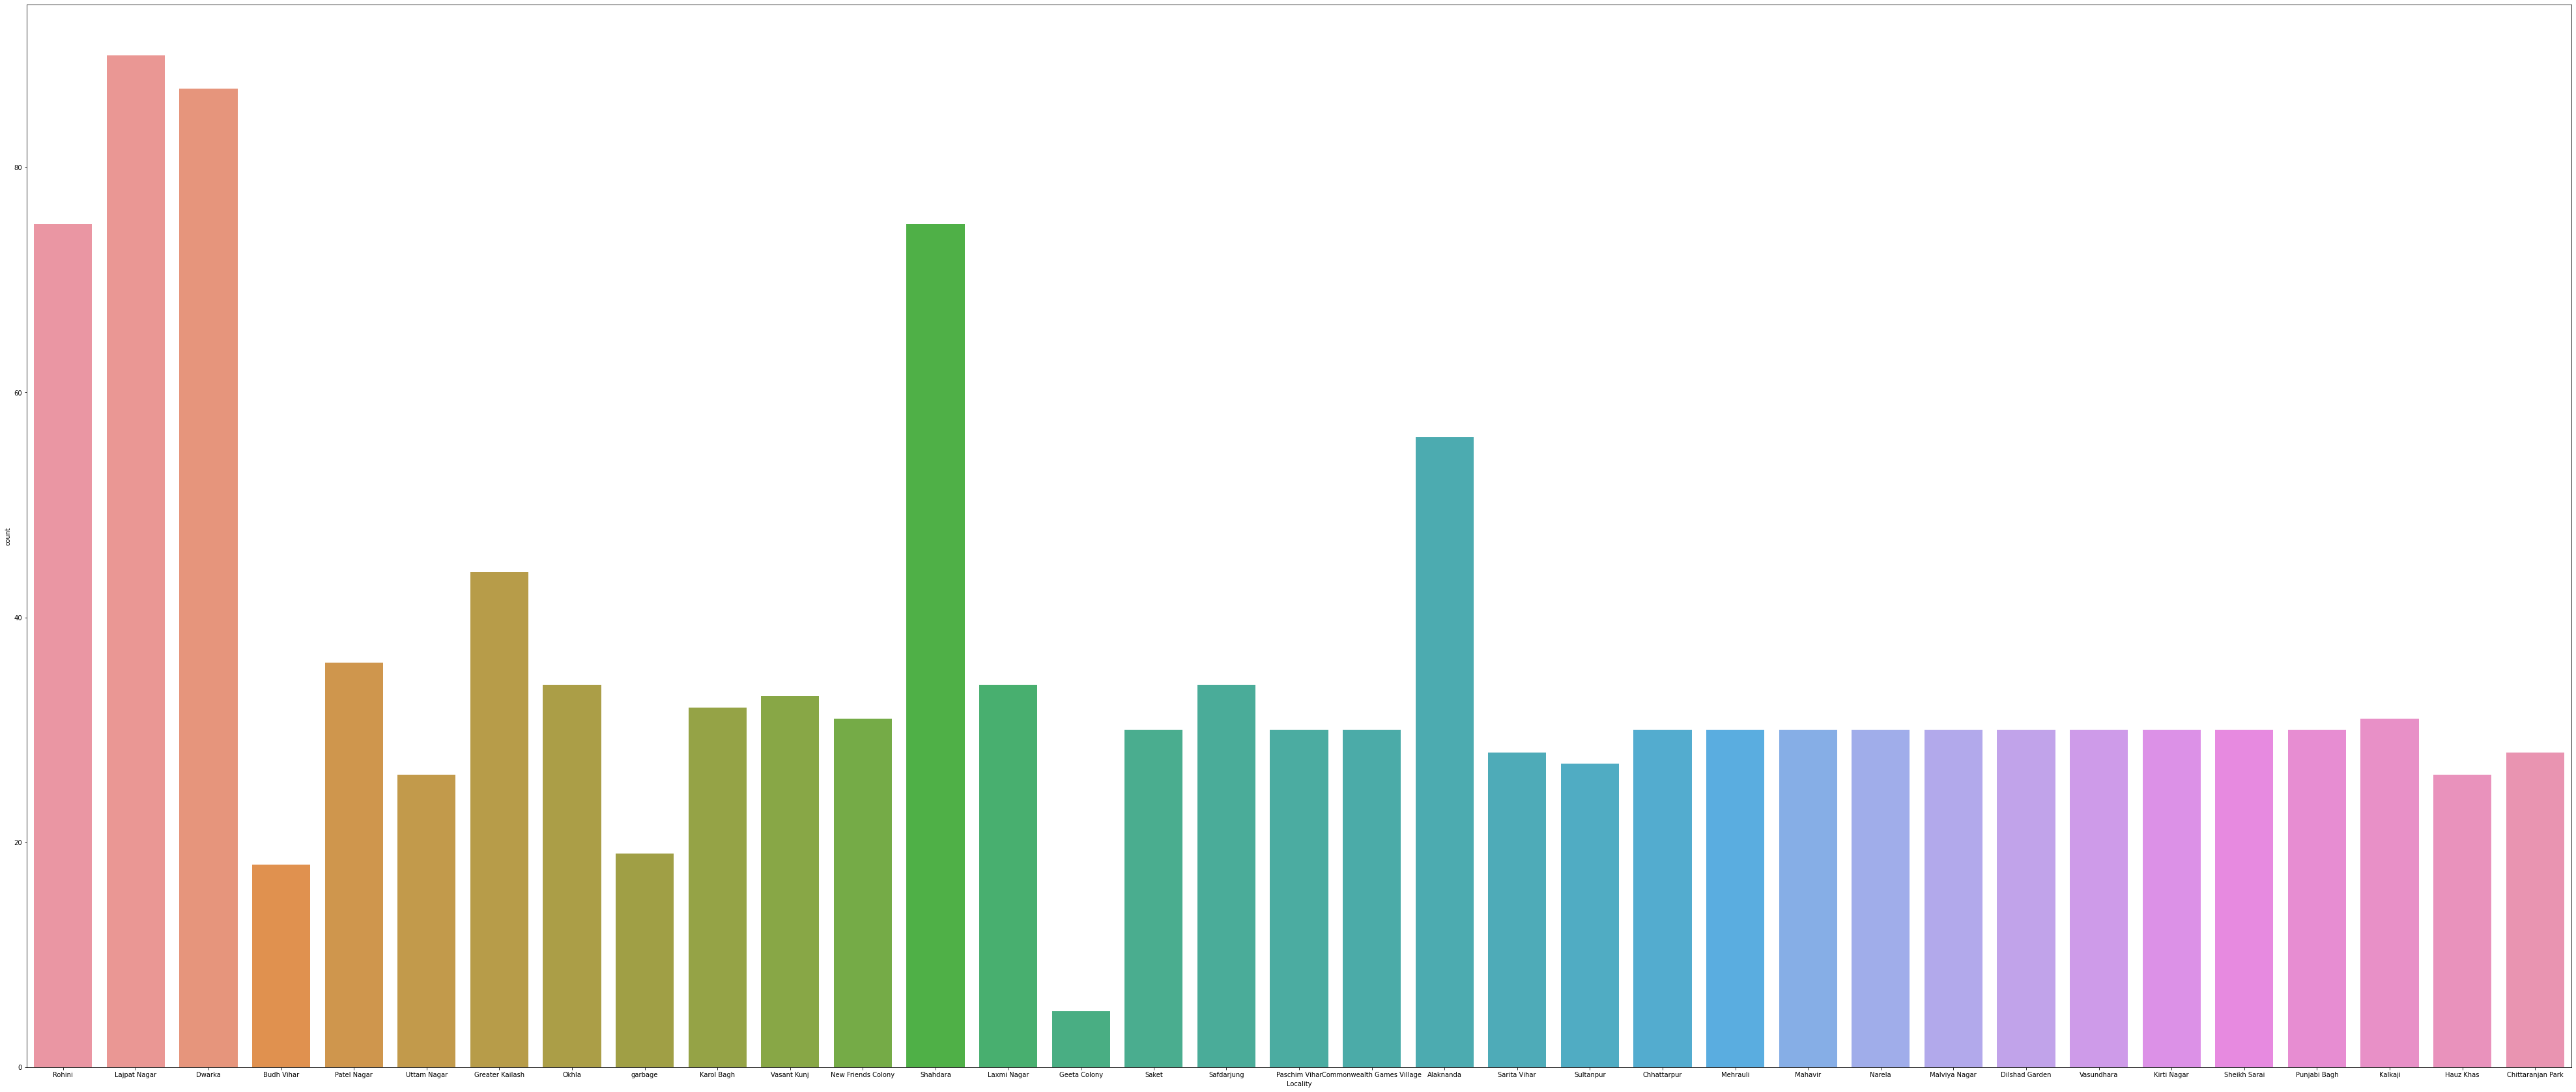

In [31]:
plt.figure(figsize=(70,30))
sns.countplot(completed_frame_demo['Locality'])

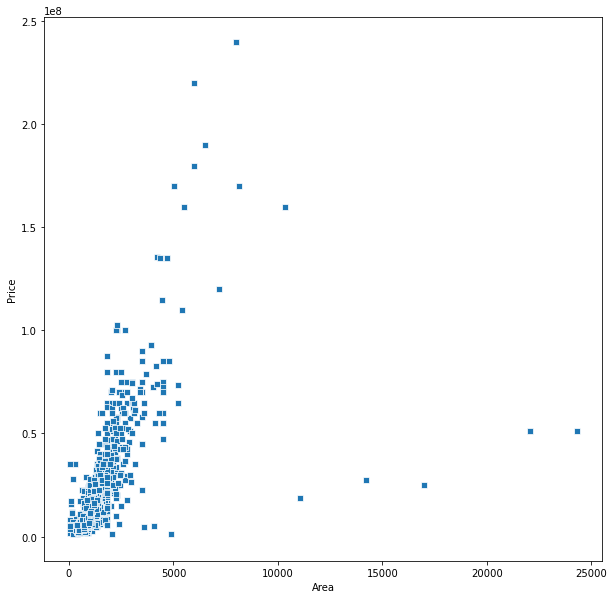

In [50]:
plt.figure(figsize=(10,10))
plt.plot(range(2003,2012,1),range(200300,201200,100))
plt.ticklabel_format(useOffset=False)
sns.scatterplot(completed_frame_demo['Area'],completed_frame_demo['Price'], marker = ',')

In [23]:
completed_frame_demo.to_csv('final.csv' , index = False)

In [24]:
demo = pd.get_dummies(completed_frame_demo,drop_first=True)

In [25]:
demo = completed_frame_demo[completed_frame_demo['Locality']!= 'garbage']

In [26]:
demo = pd.get_dummies(demo,drop_first=True)

In [27]:
demo

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnishing_Semi-Furnished,Furnishing_Unfurnished,Locality_Budh Vihar,Locality_Chhattarpur,...,Locality_Sarita Vihar,Locality_Shahdara,Locality_Sheikh Sarai,Locality_Sultanpur,Locality_Uttam Nagar,Locality_Vasant Kunj,Locality_Vasundhara,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
0,800.0,3,2.0,1.0,6500000,12500.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,750.0,2,2.0,1.0,5000000,6667.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,950.0,2,2.0,1.0,15500000,6667.0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,600.0,2,2.0,1.0,4200000,6667.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,650.0,2,2.0,1.0,6200000,6667.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1255,1050.0,3,2.0,3.0,12500000,12916.0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1256,875.0,3,3.0,3.0,17500000,12916.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1257,990.0,2,2.0,1.0,11500000,12916.0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1


In [28]:
demo.to_csv('final_with_dummies.csv', index = False)